# Okavango_Scenario

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT
from tqdm import tqdm

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


# Set Path

In [9]:
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base"
wd_bau = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_climates/scn_models/bau_ssp245-inm-cm5-0"
wd_bau2 = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_bau_fp_test"
wd_rd = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_rd"
# os.chdir(wd)



# Create Dataframe from output.hru

In [10]:
from swatmf_pkgs.swatmf_viz import read_output_mgt, read_output_hru

# Read input.std to bring area and hru number

In [11]:
hru_rd = read_output_hru(wd_bau)

In [12]:
hru_rd.head()

,lulc,hru,sub,mon,area_km2,irr_mm,irr_m3
0,CORN,000010001,1,1,0.067269,0.0,0.0
1,CORN,000010002,1,1,0.672500,0.0,0.0
2,CORN,000010003,1,1,2.622800,0.0,0.0
3,CORN,000010004,1,1,4.371300,0.0,0.0
4,CORN,000010005,1,1,0.067269,0.0,0.0


In [13]:
hru_rd.dtypes

lulc         object
hru          object
sub           int32
mon           int32
area_km2    float64
irr_mm      float64
irr_m3      float64
dtype: object

In [14]:
hru_rd_63 = hru_rd.loc[(hru_rd['sub'] == 63) & (hru_rd['hru'] == '000630001')]
# hru_rd_63 = hru_rd.loc[(hru_rd['hru'] == ' 000630001')]
hru_rd_63

,lulc,hru,sub,mon,area_km2,irr_mm,irr_m3
7509,ORAN,000630001,63,1,0.067246,0.0,0.00
29239,ORAN,000630001,63,2,0.067246,0.0,0.00
50969,ORAN,000630001,63,3,0.067246,0.0,0.00
72699,ORAN,000630001,63,4,0.067246,0.0,0.00
94429,ORAN,000630001,63,5,0.067246,30.0,2017.38
...,...,...,...,...,...,...,...
8634319,ORAN,000630001,63,8,0.067246,90.0,6052.14
8656049,ORAN,000630001,63,9,0.067246,180.0,12104.28
8677779,ORAN,000630001,63,10,0.067246,120.0,8069.52
8699509,ORAN,000630001,63,11,0.067246,90.0,6052.14


In [15]:
hru_rd_63.index = pd.date_range('1/1/2020', periods=len(hru_rd_63), freq='M')
hru_rd_63

,lulc,hru,sub,mon,area_km2,irr_mm,irr_m3
2020-01-31,ORAN,000630001,63,1,0.067246,0.0,0.00
2020-02-29,ORAN,000630001,63,2,0.067246,0.0,0.00
2020-03-31,ORAN,000630001,63,3,0.067246,0.0,0.00
2020-04-30,ORAN,000630001,63,4,0.067246,0.0,0.00
2020-05-31,ORAN,000630001,63,5,0.067246,30.0,2017.38
...,...,...,...,...,...,...,...
2050-08-31,ORAN,000630001,63,8,0.067246,90.0,6052.14
2050-09-30,ORAN,000630001,63,9,0.067246,180.0,12104.28
2050-10-31,ORAN,000630001,63,10,0.067246,120.0,8069.52
2050-11-30,ORAN,000630001,63,11,0.067246,90.0,6052.14


<AxesSubplot:>

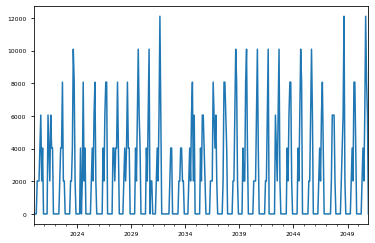

In [16]:
hru_rd_63['irr_m3'].plot()

<AxesSubplot:>

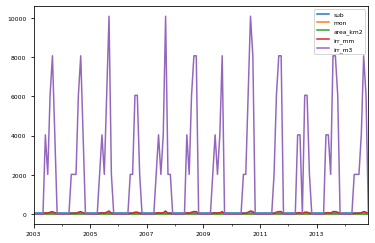

In [61]:
hru_rd_63[''].plot()

In [9]:
import matplotlib.dates as mdates
years = mdates.YearLocator()
months = mdates.MonthLocator(interval=3)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%Y')

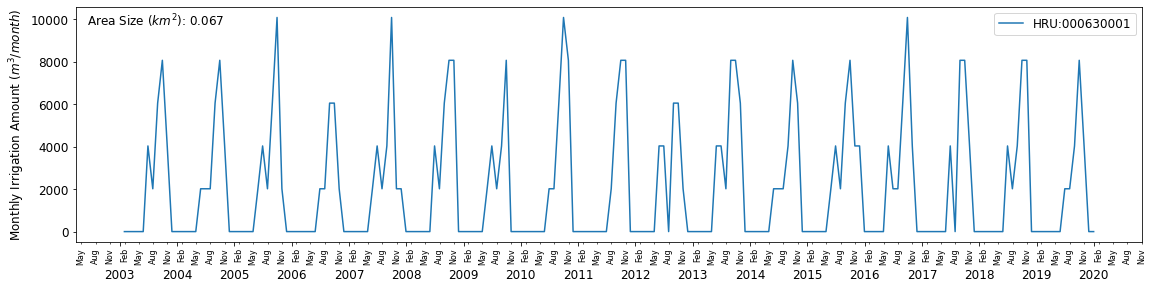

In [10]:
f, ax = plt.subplots(figsize=(16, 4))
ax.plot(hru_rd_63.index, hru_rd_63.iloc[:, -1], label='HRU:000630001')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Monthly Irrigation Amount $(m^3/month)$', fontsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()

ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=8, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=23) # add some space for the year label

ax.text(
        0.01, 0.92,
        'Area Size $(km^2)$: {:.3f}'.format(0.067246),
        horizontalalignment='left',
        # bbox=dict(facecolor='red', alpha=0.5),
        fontsize=12,
        transform=ax.transAxes
        )


f.tight_layout()
plt.savefig(os.path.join('bau_irr.jpg'), dpi=300, bbox_inches="tight")
plt.show()

In [18]:
hru_rd_f = pd.DataFrame()
for i in tqdm(range(1, 258)):
    df = hru_rd.loc[hru_rd['sub'] == i]
    df = df[['mon', 'irr_m3']]
    df = df.groupby(['mon']).sum()
    df.rename(columns={'irr_m3':i}, inplace = True)
    hru_rd_f = pd.concat([hru_rd_f, df], axis=1)

100%|██████████| 257/257 [00:02<00:00, 92.37it/s] 


In [19]:
hru_rd_f.sum().sum()

475481405.9100002

In [9]:
mgt_bau = read_output_mgt(wd_bau)

In [11]:
mgt_bau['irr_mm'].sum()

0.0

In [14]:
hru_rd_f.T.to_csv('rd_irr.csv')

In [31]:
dff = hru_rd_f.T
dff

mon,1,2,3,4,5,6,7,8,9,10,11,12
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
dff = dff.sum()
type(dff)

pandas.core.series.Series

In [35]:
from matplotlib.ticker import FuncFormatter
from swatmf_pkgs.swatmf_viz import y_fmt

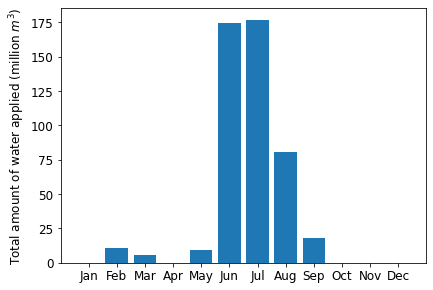

In [48]:
f, ax = plt.subplots(figsize=(6,4))
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.bar(month_names, dff.tolist())
ax.tick_params(axis='both', labelsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.set_ylabel(r'Total amount of water applied (million $m^3$)', fontsize = 12)
plt.tight_layout()
plt.savefig('irrigated_bar.png', dpi=300, bbox_inches="tight")
plt.show()


In [30]:
dff

475481405.9100003